In [1]:
import os
os.chdir('../..')

In [2]:
import Minecraft
from src.environments.casl_environment import Environment as CASLEnv
import librosa
import librosa.display as dsp
from IPython.display import Audio

In [3]:
env = CASLEnv()

In [4]:
env.reset()

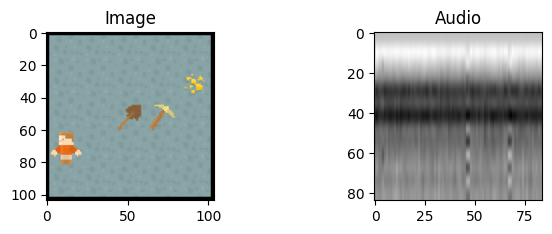

In [5]:
env.visualize_env(None,None)

In [6]:
img, audio = env._get_current_state()

In [8]:
audio.shape

(84, 84, 1)

In [12]:
audio.dtype

dtype('float32')

In [15]:
_, sr1 = librosa.load("environments/Minecraft/assets/noise.wav") 
_, sr2 = librosa.load("environments/Minecraft/assets/target_bad.wav") 
_, sr3 = librosa.load("environments/Minecraft/assets/target_good.wav")
print(sr1, sr2, sr3)

22050 22050 22050


In [19]:
Audio(data=audio.squeeze(2),rate=22050)

In [45]:
env.step(1)

(-1, False)

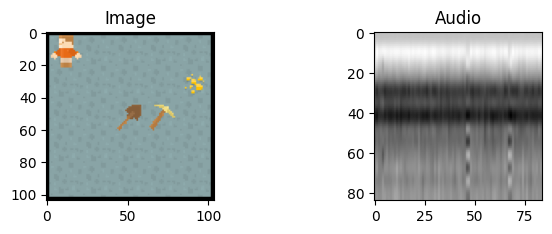

In [46]:
env.visualize_env(None,None)

In [47]:
img, audio = env._get_current_state()

In [48]:
audio.shape

(84, 84, 1)

In [49]:
noise, sr1 = librosa.load("environments/Minecraft/assets/noise.wav") 
target_bad, sr2 = librosa.load("environments/Minecraft/assets/target_bad.wav") 
target_good, sr3 = librosa.load("environments/Minecraft/assets/target_good.wav")
print(sr1, sr2, sr3)

22050 22050 22050


In [262]:
Audio(data=noise,rate=22050)

In [263]:
Audio(data=target_bad,rate=22050)

In [264]:
Audio(data=target_good,rate=22050)

In [ ]:
# Each audio state is a complete mfcc of the Image \ Audio singal
# - this is a big caveat for this research!! Sound is not processed step by step!
# Also there are only 3 distinct sounds
# This is what is returned for sound:
def _get_mfcc(self, filename):
    (samplerate, audio) = wav.read(filename)
    return self._wav_to_mfcc(samplerate, audio)


In [221]:
from enum import Enum

class CASLAction(Enum):
    NOP = 0
    UP = 1
    DOWN = 2
    RIGHT = 3
    LEFT = 4

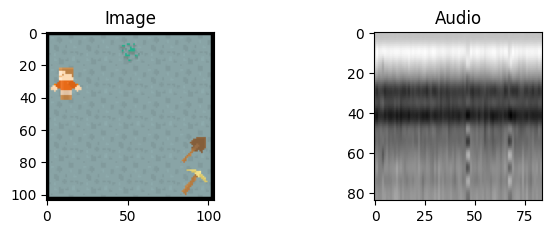

reward: -1, done: False


In [277]:
reward, done = env.step(CASLAction.UP.value)
env.visualize_env(None,None)
print(f'reward: {reward}, done: {done}')
img, audio = env._get_current_state()

In [279]:
m = Minecraft.Minecraft()

In [281]:
v,a = m.reset()

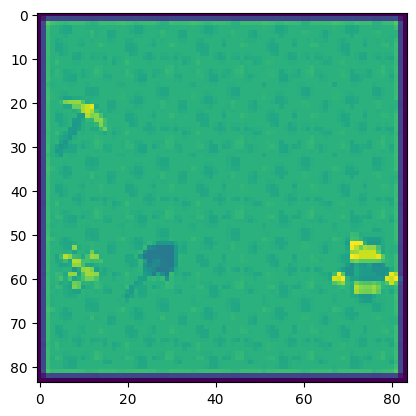

In [300]:
m.step(CASLAction.DOWN.value, 0, 0)
v, a = m._get_obs()
plt.imshow(v)

In [ ]:
import re
def get_libs(path):
    libs = {}
    with open(path, 'r') as f:
        for line in f.readlines():
            parsed = re.findall("([\w|-]+)\s*(.*)", line)[0]
            libs[parsed[0]] = parsed[1]
    return libs
colab_libs = get_libs('/Users/nirweingarten/Desktop/pip_clean_rl.txt')
local_libs = get_libs('/Users/nirweingarten/Desktop/pip_list_multi.txt')
not_in_colab = set(local_libs.keys()).difference(set(colab_libs.keys()))
not_in_local = set(set(colab_libs.keys())).difference(set(local_libs.keys()))
in_both = set(local_libs.keys()).intersection(set(colab_libs.keys()))